# Importing data and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("C:/Users/samde/Desktop/Data Science/Datasets/titanic/train.csv")
test=pd.read_csv("C:/Users/samde/Desktop/Data Science/Datasets/titanic/test.csv")

# Exploratory Data Analysis

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

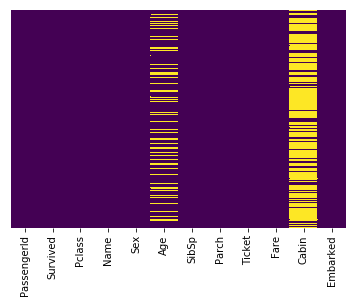

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

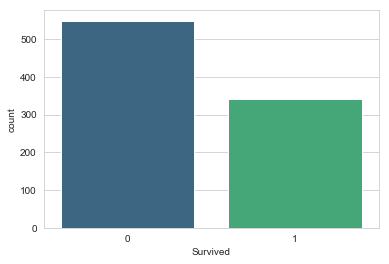

In [8]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',data=train,palette='viridis')

In [9]:
train.Pclass.value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [11]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


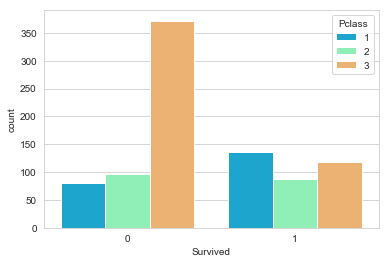

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [13]:
train.Sex.value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [14]:
train.groupby('Survived').Sex.value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

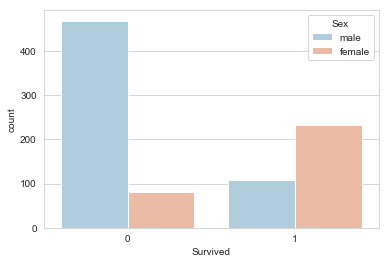

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

In [16]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


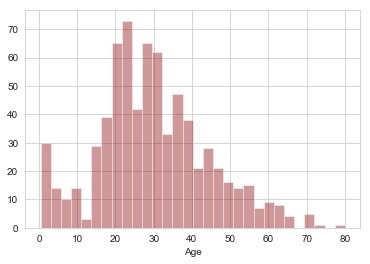

In [17]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

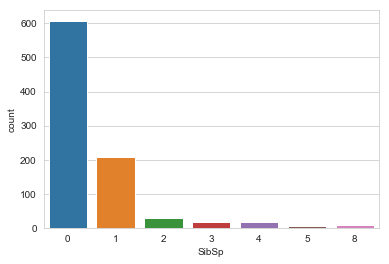

In [18]:
sns.countplot(x='SibSp',data=train)

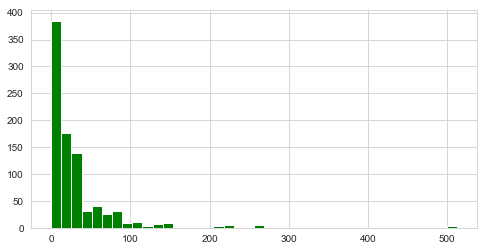

In [19]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

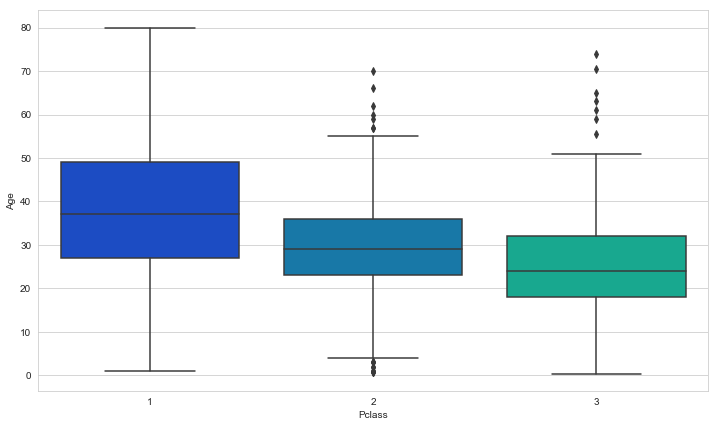

In [20]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

# Data Preprocessing

In [25]:
Survived=train['Survived']

In [26]:
train2=train.drop('Survived',axis=1)

In [27]:
data = train2.append(test, sort = True)

In [28]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
dtype: int64

In [29]:
data.drop('Cabin',axis=1,inplace=True)

In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [24]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

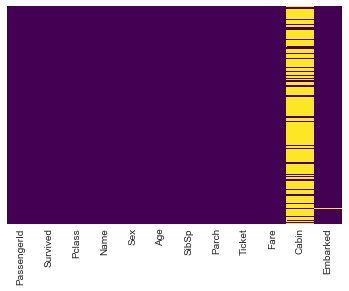

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
train.dropna(inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [30]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [31]:
train = pd.concat([train,sex,embark],axis=1)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Modeling for Logistic Regression

In [36]:
from sklearn.model_selection import train_test_split

In [ ]:
train.drop(['PassengerId'],inplace=True,axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
predictions = logmodel.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



# Using hyperopt to tune parameters

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold,cross_val_score
import lightgbm
skf = KFold(n_splits=5)

def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'num_leaves': int(params['num_leaves']),
        'bagging_fraction': "{:.3f}".format(params['bagging_fraction']),
        'learning_rate': "{:.3f}".format(params['learning_rate']),
        'bagging_freq': int(params['bagging_freq']),
        'feature_fraction': '{:.3f}'.format(params['feature_fraction']),


    }
    
    clf = lightgbm.LGBMClassifier(
        n_estimators=2000, 
        objective="binary", # Seting model to run on GPU
        **params
        )
    
    # clf.fit(X_train, y_train)
    # y_pred_train = clf.predict_proba(X_val)[:,1]
    # score = roc_auc_score(y_val, y_pred_train)
    score = cross_val_score(clf, X, y, scoring='roc_auc', cv=skf).mean() #Using the TimeSeriesSplit
    print(f'ROC AUC CV-Score: {score}')    
    # print("Accuracy {:.8f} params {}".format(-score, params))
    
    return -score

space = {
    'max_depth': hp.randint('max_depth',20),
    'num_leaves':  hp.randint('num_leaves',300),
    'bagging_fraction': hp.uniform('bagging_fraction', 0.2, 1.0),
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.2),
    'bagging_freq': hp.randint('bagging_freq',40),
    'feature_fraction': hp.uniform('feature_fraction', 0.3, 1.0),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=15)

In [ ]:
param1={'bagging_fraction': 0.8488848775507463, 'bagging_freq': 10, 'feature_fraction': 0.36742832381321716, 'learning_rate': 0.0431385893384868, 'max_depth': 2, 'num_leaves': 297,"objective" : 'binary','metric': 'auc'}

# Modelling with LightGBM

In [ ]:
# Modelling with LightGBM and getting feature importance
from sklearn.model_selection import KFold, StratifiedKFold
import lightgbm as lgb
FOLDs = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

oof_lgb = np.zeros(len(X))
predictions_lgb = np.zeros(len(test))

features_lgb = list(X.columns)
feature_importance_df_lgb = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(X, y)):
    trn_data = lgb.Dataset(X.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[val_idx], label=y.iloc[val_idx])
    print(trn_idx)

    print("LGB " + str(fold_) + "-" * 50)
    num_round = 20000
    clf = lgb.train(param1,trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 400)
    oof_lgb[val_idx] = clf.predict(X.iloc[val_idx], num_iteration=clf.best_iteration)
    predictions_lgb += clf.predict(test, num_iteration=clf.best_iteration) / FOLDs.n_splits
    fold_importance_df_lgb = pd.DataFrame()
    fold_importance_df_lgb["feature"] = features_lgb
    fold_importance_df_lgb["importance"] = clf.feature_importance()
    fold_importance_df_lgb["fold"] = fold_ + 1
    feature_importance_df_lgb = pd.concat([feature_importance_df_lgb, fold_importance_df_lgb], axis=0)
    
lgb.plot_importance(clf, max_num_features=30)    
cols = feature_importance_df_lgb[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:50].index
best_features_lgb = feature_importance_df_lgb.loc[feature_importance_df_lgb.feature.isin(cols)]
plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features_lgb.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')
